In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("merged_data_final.csv")

# check first 4 lines
print(data.head())


   County_Name  Brightness  Real_GDP_2019 Average_Annual_Count  \
0     Allegany      2694.3        1723115                    7   
1        Bronx     81936.7       44654229                   77   
2       Broome     18621.5        9235160                   21   
3  Cattaraugus      6915.9        2912501                   11   
4       Cayuga      7831.0        2901102                   11   

  Age_Adjusted_Death_Rate_deaths_per_100,000  Depression_Rate(per_100k)  \
0                                       17.3                  23.162570   
1                                        5.2                  23.616869   
2                                         11                  38.438121   
3                                       15.8                  27.895255   
4                                       14.5                  36.156890   

   PTSD_rate(per_100k)  Trauma_rate(per_100k)  tree_cover_loss_2019  \
0            15.012777                   59.6             57.145777   
1         

In [228]:
# Load the full dataset
data_cleaned = pd.read_csv("merged_data_final.csv")  # Replace with your actual file path

# Verify the updated columns
print(data_cleaned.columns)


Index(['County_Name', 'Brightness', 'Real_GDP_2019', 'Average_Annual_Count',
       'Age_Adjusted_Death_Rate_deaths_per_100,000',
       'Depression_Rate(per_100k)', 'PTSD_rate(per_100k)',
       'Trauma_rate(per_100k)', 'tree_cover_loss_2019',
       'gross_emissions_co2e_all_gases_Mg_2019'],
      dtype='object')


In [238]:
data_cleaned.columns = data_cleaned.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')


In [239]:
print(data_cleaned.columns)

Index(['County_Name', 'Brightness', 'Real_GDP_2019', 'Average_Annual_Count',
       'Age_Adjusted_Death_Rate_deaths_per_100000', 'Depression_Rateper_100k',
       'PTSD_rateper_100k', 'Trauma_rateper_100k', 'tree_cover_loss_2019',
       'gross_emissions_co2e_all_gases_Mg_2019'],
      dtype='object')


In [240]:
# ensure are variable are numeric
columns_to_convert = [dependent_var] + independent_vars
data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')

data_cleaned['Average_Annual_Count'] = pd.to_numeric(data_cleaned['Average_Annual_Count'], errors='coerce')
# check if there are any variable are 
print(data_cleaned.dtypes)

data_cleaned = data_cleaned.dropna(subset=independent_vars + [dependent_var])



County_Name                                   object
Brightness                                   float64
Real_GDP_2019                                  int64
Average_Annual_Count                         float64
Age_Adjusted_Death_Rate_deaths_per_100000    float64
Depression_Rateper_100k                      float64
PTSD_rateper_100k                            float64
Trauma_rateper_100k                          float64
tree_cover_loss_2019                         float64
gross_emissions_co2e_all_gases_Mg_2019       float64
dtype: object


In [ ]:
# print data
print("Before Dropna Shape:", data_cleaned.shape)

# Determines whether a column in subset exists 
subset_columns = independent_vars + [dependent_var]
print("Subset Columns:", subset_columns)
print("Are Subset Columns in Data Cleaned:", all(col in data_cleaned.columns for col in subset_columns))

# dropna and print
data_cleaned = data_cleaned.dropna(subset=subset_columns)
print("After Dropna Shape:", data_cleaned.shape)


Before Dropna Shape: (57, 10)
Subset Columns: ['Brightness', 'Real_GDP_2019', 'Depression_Rateper_100k', 'PTSD_rateper_100k', 'Trauma_rateper_100k', 'tree_cover_loss_2019', 'Age_Adjusted_Death_Rate_deaths_per_100000']
Are Subset Columns in Data Cleaned: True
After Dropna Shape: (57, 10)


In [242]:
print(data_cleaned.columns)
print(independent_vars)
print(dependent_var)


Index(['County_Name', 'Brightness', 'Real_GDP_2019', 'Average_Annual_Count',
       'Age_Adjusted_Death_Rate_deaths_per_100000', 'Depression_Rateper_100k',
       'PTSD_rateper_100k', 'Trauma_rateper_100k', 'tree_cover_loss_2019',
       'gross_emissions_co2e_all_gases_Mg_2019'],
      dtype='object')
['Brightness', 'Real_GDP_2019', 'Depression_Rateper_100k', 'PTSD_rateper_100k', 'Trauma_rateper_100k', 'tree_cover_loss_2019']
Age_Adjusted_Death_Rate_deaths_per_100000


In [243]:
print(data_cleaned.shape)

(57, 10)


In [237]:
import pandas as pd
import statsmodels.api as sm

# define the independent variable and dependent variable
dependent_var = 'Age_Adjusted_Death_Rate_deaths_per_100000'  
independent_vars = [
    'Brightness', 
    'Real_GDP_2019', 
    'Depression_Rateper_100k'  , 
    'PTSD_rateper_100k', 
    'Trauma_rateper_100k' , 
    'tree_cover_loss_2019'
]

# Extract the target variable (y) and the predictor matrix (X).
y = data_cleaned[dependent_var]
X = data_cleaned[independent_vars]

#add a constant term to the predictor variables (X)
X = sm.add_constant(X)

# build glm model(GLM)
glm_model = sm.GLM(y, X, family=sm.families.Poisson())
glm_results = glm_model.fit()

print(glm_results.summary())


                             Generalized Linear Model Regression Results                             
Dep. Variable:     Age_Adjusted_Death_Rate_deaths_per_100000   No. Observations:                   57
Model:                                                   GLM   Df Residuals:                       50
Model Family:                                        Poisson   Df Model:                            6
Link Function:                                           Log   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -135.70
Date:                                       Mon, 09 Dec 2024   Deviance:                       26.579
Time:                                               13:09:11   Pearson chi2:                     26.1
No. Iterations:                                            4   Pseudo R-squ. (CS):             0.4259
Covariance Type:                                   nonrobust                      

Check if there is any multicolliearity:

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add constant term
X = sm.add_constant(data_cleaned[independent_vars])

# calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                  Variable        VIF
0                    const  38.156522
1               Brightness   2.940790
2            Real_GDP_2019   2.288067
3  Depression_Rateper_100k   2.250818
4        PTSD_rateper_100k   3.219255
5      Trauma_rateper_100k   4.162809
6     tree_cover_loss_2019   1.084956


All VIF<5 no need to delete or combine the variable

Stepwise regression method for variable selection:

In [155]:
import itertools

# All posssible combination
variables = independent_vars
best_aic = float("inf")
best_model = None

for L in range(1, len(variables) + 1):
    for subset in itertools.combinations(variables, L):
        X = sm.add_constant(data_cleaned[list(subset)])
        model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_model = model
            best_subset = subset

print("best combination:", best_subset)
print(best_model.summary())


best combination: ('Brightness', 'Depression_Rateper_100k', 'Trauma_rateper_100k')
                             Generalized Linear Model Regression Results                             
Dep. Variable:     Age_Adjusted_Death_Rate_deaths_per_100000   No. Observations:                   57
Model:                                                   GLM   Df Residuals:                       53
Model Family:                                        Poisson   Df Model:                            3
Link Function:                                           Log   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -136.48
Date:                                       Sun, 08 Dec 2024   Deviance:                       28.139
Time:                                               14:18:03   Pearson chi2:                     28.2
No. Iterations:                                            4   Pseudo R-squ. (CS):             0.4100

AIC prfer those three variable. Brightness and truma are the best. Depression has relative high p value. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PoissonRegressor

# gest best combination
X_best = data_cleaned[['Brightness', 'Depression_Rate(per_100k)', 'Trauma_rate(per_100k)']]
y_best = data_cleaned['Age_Adjusted_Death_Rate_deaths_per_100,000']

# use sklearn Poisson regression
model = PoissonRegressor()
scores = cross_val_score(model, X_best, y_best, cv=5, scoring='neg_mean_poisson_deviance')

print("Cross verification score:", scores)
print("average score:", scores.mean())


交叉验证得分: [-0.67052908 -0.82707651 -1.04356048 -1.00315382 -0.38629444]
平均得分: -0.7861228643711737


Optimization model (1) Feature standardization:

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_best)

model = PoissonRegressor()
scores = cross_val_score(model, X_scaled, y_best, cv=20, scoring='neg_mean_poisson_deviance')

print("标准化后的交叉验证得分:", scores)
print("标准化后的平均得分:", scores.mean())


标准化后的交叉验证得分: [-0.76852498 -0.42967879 -0.47646658 -1.17001292 -0.14008467 -0.58456306
 -0.20349305 -2.14302891 -0.06819547 -0.39771573 -0.13451109 -0.47382875
 -1.13470402 -1.6367241  -0.19945018 -0.02353537 -0.15787821 -0.67746534
 -0.71475746 -0.15661694]
标准化后的平均得分: -0.5845617812739415


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# get variable 
selected_vars = ['Brightness', 'Depression_Rate(per_100k)', 'Trauma_rate(per_100k)']
X_selected = data_cleaned[selected_vars]
y_selected = data_cleaned['Age_Adjusted_Death_Rate_deaths_per_100,000']

# add constant
X_selected = sm.add_constant(X_selected)

# Glm model
glm_model = sm.GLM(y_selected, X_selected, family=sm.families.Poisson()).fit()

# print
print(glm_model.summary())


                             Generalized Linear Model Regression Results                              
Dep. Variable:     Age_Adjusted_Death_Rate_deaths_per_100,000   No. Observations:                   57
Model:                                                    GLM   Df Residuals:                       53
Model Family:                                         Poisson   Df Model:                            3
Link Function:                                            Log   Scale:                          1.0000
Method:                                                  IRLS   Log-Likelihood:                -136.48
Date:                                        Sat, 07 Dec 2024   Deviance:                       28.139
Time:                                                21:16:32   Pearson chi2:                     28.2
No. Iterations:                                             4   Pseudo R-squ. (CS):             0.4100
Covariance Type:                                    nonrobust            

In [69]:
corr_matrix = data_cleaned[['Depression_Rate(per_100k)', 'Trauma_rate(per_100k)', 'Brightness']].corr()
print(corr_matrix)


                           Depression_Rate(per_100k)  Trauma_rate(per_100k)  \
Depression_Rate(per_100k)                    1.00000               0.705510   
Trauma_rate(per_100k)                        0.70551               1.000000   
Brightness                                  -0.17183              -0.459732   

                           Brightness  
Depression_Rate(per_100k)   -0.171830  
Trauma_rate(per_100k)       -0.459732  
Brightness                   1.000000  


Depression_Rate(per_100k) 和 Trauma_rate(per_100k)：
The correlation coefficient is 0.7055, indicating a strong positive correlation between the two. This can lead to multicollinearity problems, masking the true effect of one of the variables.

In [ ]:
# Replace invalid characters in column names
data_cleaned.columns = data_cleaned.columns.str.replace('[()]', '', regex=True)
data_cleaned.columns = data_cleaned.columns.str.replace('[,]', '', regex=True)
data_cleaned.columns = data_cleaned.columns.str.replace(' ', '_')

# check column name
print(data_cleaned.columns)


Index(['County_Name', 'Brightness', 'Real_GDP_2019', 'Average_Annual_Count',
       'Age_Adjusted_Death_Rate_deaths_per_100000', 'Depression_Rateper_100k',
       'PTSD_rateper_100k', 'Trauma_rateper_100k', 'tree_cover_loss_2019',
       'gross_emissions_co2e_all_gases_Mg_2019', 'Depression:Trauma'],
      dtype='object')


In [ ]:
data_cleaned['Depression_Trauma'] = data_cleaned['Depression_Rateper_100k'] * data_cleaned['Trauma_rateper_100k']

formula = 'Age_Adjusted_Death_Rate_deaths_per_100000 ~ Depression_Rateper_100k + Trauma_rateper_100k + Brightness + Depression_Trauma'

glm_interaction = smf.glm(
    formula=formula,
    data=data_cleaned,
    family=sm.families.Poisson()
).fit()

print(glm_interaction.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     Age_Adjusted_Death_Rate_deaths_per_100000   No. Observations:                   57
Model:                                                   GLM   Df Residuals:                       52
Model Family:                                        Poisson   Df Model:                            4
Link Function:                                           Log   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -135.55
Date:                                       Sat, 07 Dec 2024   Deviance:                       26.284
Time:                                               21:28:59   Pearson chi2:                     26.9
No. Iterations:                                            4   Pseudo R-squ. (CS):             0.4289
Covariance Type:                                   nonrobust                      

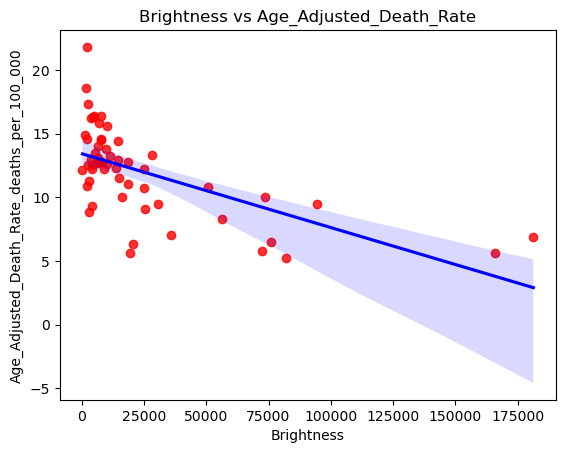

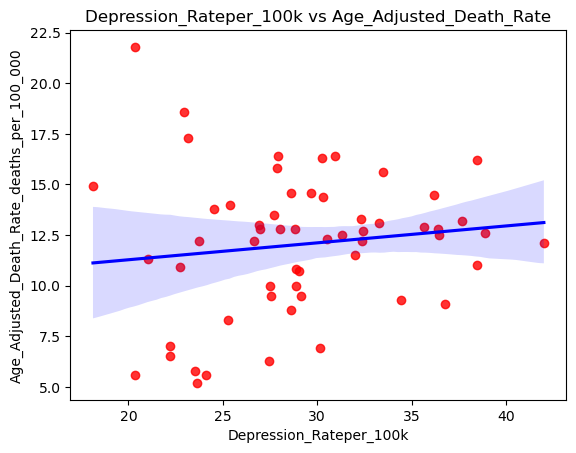

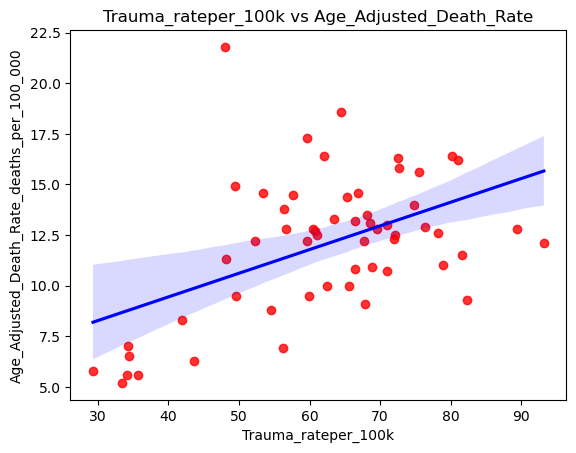

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# variable list
variables = ['Brightness', 'Depression_Rateper_100k', 'Trauma_rateper_100k']

# plot 
for var in variables:
    plt.figure()  
    sns.regplot(
        x=var,
        y='Age_Adjusted_Death_Rate_deaths_per_100000',
        data=data_cleaned,
        scatter_kws={'color': 'red'},  
        line_kws={'color': 'blue'},   
        logistic=False
    )
    plt.title(f"{var} vs Age_Adjusted_Death_Rate")
    plt.xlabel(var)
    plt.ylabel('Age_Adjusted_Death_Rate_deaths_per_100_000')

    # save image 
    filename = f"{var}_vs_Age_Adjusted_Death_Rate.png"  
    plt.savefig(filename, dpi=300, bbox_inches='tight') #save

    # plot 
    plt.show()


spatial analysis：

In [ ]:
# Generate predicted value
data_cleaned['Predicted'] = glm_model.predict(X_selected)

# generate actual and predicted data
county_analysis = data_cleaned[['County_Name', 'Age_Adjusted_Death_Rate_deaths_per_100000', 'Predicted']]

# calculate the residual
county_analysis['Residuals'] = (
    county_analysis['Age_Adjusted_Death_Rate_deaths_per_100000'] - county_analysis['Predicted']
)


print(county_analysis.head())


   County_Name  Age_Adjusted_Death_Rate_deaths_per_100000  Predicted  \
0     Allegany                                       17.3  13.857312   
1        Bronx                                        5.2   7.290902   
2       Broome                                       11.0  12.291375   
3  Cattaraugus                                       15.8  14.308019   
4       Cayuga                                       14.5  10.979771   

   Residuals  
0   3.442688  
1  -2.090902  
2  -1.291375  
3   1.491981  
4   3.520229  


/var/folders/zh/q1nx6lrn0m31z31n4vtjk_fw0000gn/T/ipykernel_23033/3837938929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_analysis['Residuals'] = (


In [ ]:
#Sort the residuals to find the counties with the biggest deviations
county_analysis = county_analysis.sort_values(by='Residuals', ascending=False)

# The top 10 counties with the largest output deviations
print("Counties with highest positive residuals:")
print(county_analysis.head(10))

print("\nCounties with highest negative residuals:")
print(county_analysis.tail(10))


Counties with highest positive residuals:
   County_Name  Age_Adjusted_Death_Rate_deaths_per_100000  Predicted  \
21       Lewis                                       21.8  12.988669   
11    Delaware                                       18.6  14.619897   
4       Cayuga                                       14.5  10.979771   
15    Franklin                                       16.4  12.892357   
0     Allegany                                       17.3  13.857312   
54       Wayne                                       14.6  11.779018   
7     Chenango                                       16.2  13.492104   
16      Fulton                                       16.3  13.971023   
6      Chemung                                       15.6  13.337301   
29      Oneida                                       13.3  11.073784   

    Residuals  
21   8.811331  
11   3.980103  
4    3.520229  
15   3.507643  
0    3.442688  
54   2.820982  
7    2.707896  
16   2.328977  
6    2.262699  
29   

combine analysis data with geo data

In [ ]:
# Load a file containing latitude and longitude
geo_data = pd.read_csv('merged_data_with_geo_updated.csv')

# Make sure both sets of data have a common County_Name or similar unique identifier
merged_data = county_analysis.merge(geo_data[['County_Name', 'latitude', 'longitude']], on='County_Name', how='left')

#  print merge dataset
print(merged_data.head())

merged_data.to_csv('merged_data_with_predictions.csv', index=False)
print("数据已成功保存为 'merged_data_with_predictions.csv'")




  County_Name  Age_Adjusted_Death_Rate_deaths_per_100000  Predicted  \
0       Lewis                                       21.8  12.988669   
1    Delaware                                       18.6  14.619897   
2      Cayuga                                       14.5  10.979771   
3    Franklin                                       16.4  12.892357   
4    Allegany                                       17.3  13.857312   

   Residuals   latitude  longitude  
0   8.811331  43.782706 -75.444132  
1   3.980103  42.193987 -74.966728  
2   3.520229  43.008546 -76.574587  
3   3.507643  44.594376 -74.310670  
4   3.442688  42.247853 -78.026153  
数据已成功保存为 'merged_data_with_predictions.csv'


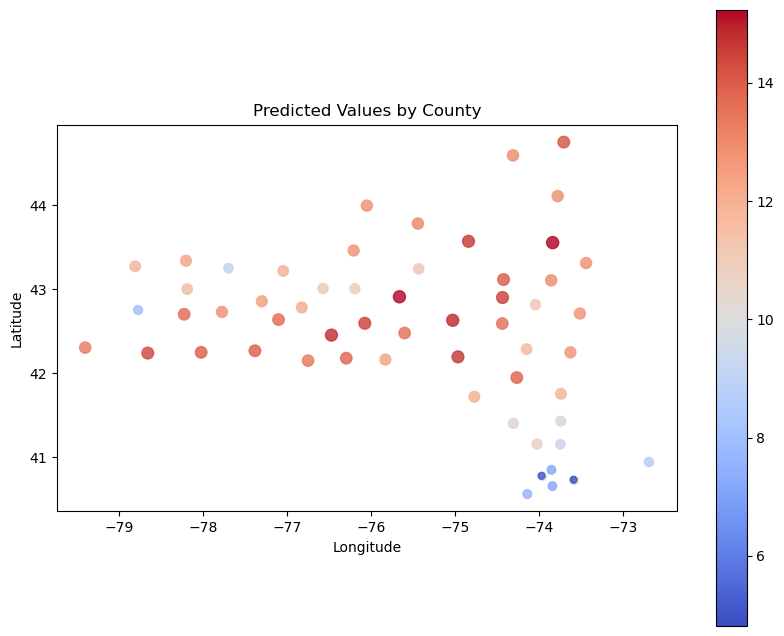

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# change dataset to GeoDataFrame
merged_data['geometry'] = merged_data.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
geo_df = gpd.GeoDataFrame(merged_data, geometry='geometry')

# Draw a map to mark the Predicted distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
geo_df.plot(ax=ax, color='lightgrey', alpha=0.5)  # plot graph

# Draw Predicted points, color or size that can represent the size of the Predicted value
geo_df.plot(
    ax=ax,
    column='Predicted',  # Use Predicted values as the color distribution basis
    cmap='coolwarm',      #  Color mapping scheme (can be changed to other, such as 'viridis' or 'plasma')
    legend=True,          # add legend
    markersize=geo_df['Predicted'] * 5,  # ajuest line
    alpha=0.8             # set transparent 
)

plt.title("Predicted Values by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


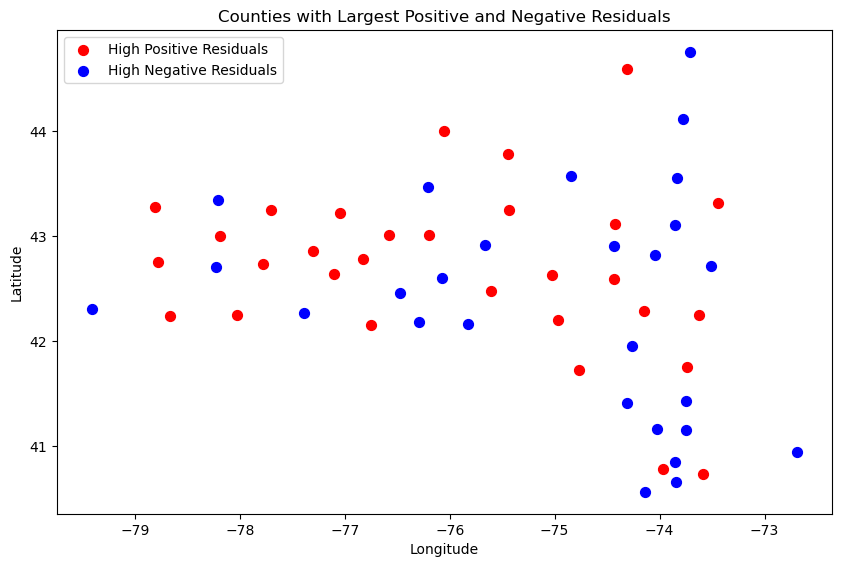

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# change dataset to GeoDataFrame
merged_data['geometry'] = merged_data.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
geo_df = gpd.GeoDataFrame(merged_data, geometry='geometry')

# Draw a map and mark the counties with the greatest deviations
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
geo_df.plot(ax=ax, color='lightgrey', alpha=0.5)  

# Points with high positive deviation (counties with the largest deviation)
geo_df[geo_df['Residuals'] > 0].plot(ax=ax, color='red', markersize=50, label='High Positive Residuals')
# Points of high negative deviation
geo_df[geo_df['Residuals'] < 0].plot(ax=ax, color='blue', markersize=50, label='High Negative Residuals')

plt.legend()
plt.title("Counties with Largest Positive and Negative Residuals")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import numpy as np


In [ ]:

# Load geographic boundary data
geo_data = gpd.read_file('Counties.shp')  # Replace with shapefile path

# load CSV
stat_data = pd.read_csv('merged_data_with_predictions_GIS.csv')

# Merge data: Combine statistics to geographic boundaries through common columns
geo_data = geo_data.merge(stat_data, on='NAME')


count    57.000000
mean     12.040351
std       2.404069
min       4.813848
25%      10.981784
50%      12.672271
75%      13.732453
max      15.233114
Name: Predicted, dtype: float64


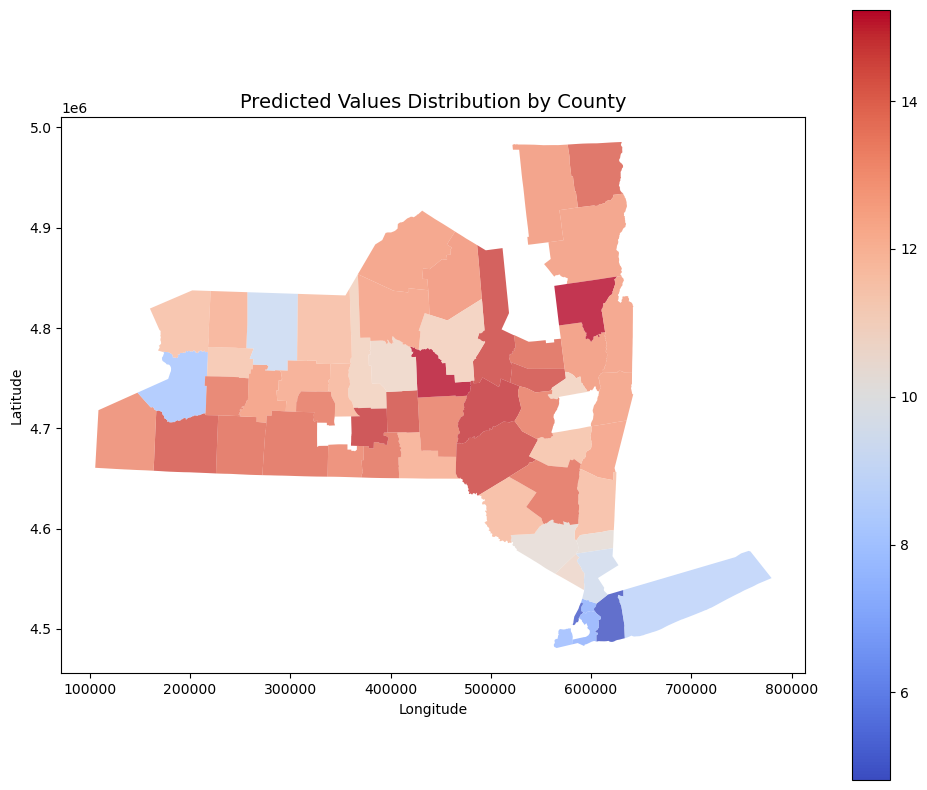

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# load geo boundary data 
geo_data = gpd.read_file('Counties.shp') 

# read pred data
stat_data = pd.read_csv('merged_data_with_predictions_GIS.csv')

# check column name
geo_data.columns = geo_data.columns.str.strip()
stat_data.columns = stat_data.columns.str.strip()

# combine 
geo_data = geo_data.merge(stat_data, on='NAME', how='left')

# GeoDataFrame
geo_data = gpd.GeoDataFrame(geo_data, geometry='geometry')

# check if  'Predicted' column has the number
print(geo_data['Predicted'].describe())

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# plot the color for 'Predicted' 
geo_data.plot(ax=ax, column='Predicted', cmap='coolwarm', legend=True, alpha=0.8)

# set the title 
plt.title("Predicted Values Distribution by County", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# plot
plt.show()


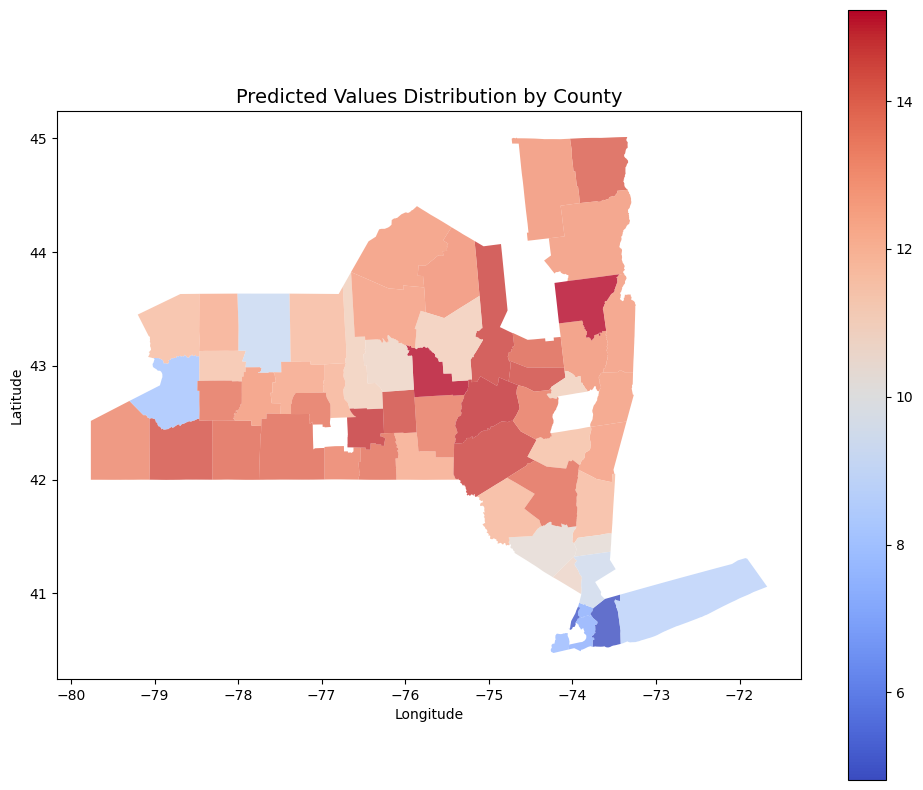

In [ ]:
# Change setting to WGS84
geo_data = geo_data.to_crs(epsg=4326)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# fill in color  'Predicted' 
geo_data.plot(ax=ax, column='Predicted', cmap='coolwarm', legend=True, alpha=0.8)

# set name and title 
plt.title("Predicted Values Distribution by County", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# save 
plt.savefig("predicted_values_distribution.png", dpi=300, bbox_inches='tight')

plt.show()


In [101]:
import geopandas as gpd

# 加载 Shapefile 文件
shapefile_path = 'Counties.shp'
geo_data = gpd.read_file(shapefile_path)

# 查看列名
print("Shapefile 列名:")
print(geo_data.columns)

Shapefile 列名:
Index(['NAME', 'ABBREV', 'GNIS_ID', 'FIPS_CODE', 'SWIS', 'NYSP_ZONE',
       'POP1990', 'POP2000', 'POP2010', 'POP2020', 'DOS_LL', 'DOSLL_DATE',
       'NYC', 'CALC_SQ_MI', 'DATEMOD', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [ ]:
print(geo_data.columns)  # View the columns of geo data
print(predicted_data.columns)  # Look at the columns of predicted data


Index(['NAME', 'ABBREV', 'GNIS_ID', 'FIPS_CODE', 'SWIS', 'NYSP_ZONE',
       'POP1990', 'POP2000', 'POP2010', 'POP2020', 'DOS_LL', 'DOSLL_DATE',
       'NYC', 'CALC_SQ_MI', 'DATEMOD', 'Shape_Leng', 'Shape_Area', 'geometry',
       'Age_Adjusted_Death_Rate_deaths_per_100000', 'Predicted', 'Residuals',
       'latitude', 'longitude'],
      dtype='object')
Index(['NAME', 'Age_Adjusted_Death_Rate_deaths_per_100000', 'Predicted',
       'Residuals', 'latitude', 'longitude', 'geometry'],
      dtype='object')


In [187]:
print(data.columns)

Index(['County_Name', 'Brightness', 'Real_GDP_2019', 'Average_Annual_Count',
       'Age_Adjusted_Death_Rate_deaths_per_100,000',
       'Depression_Rate(per_100k)', 'PTSD_rate(per_100k)',
       'Trauma_rate(per_100k)', 'tree_cover_loss_2019',
       'gross_emissions_co2e_all_gases_Mg_2019'],
      dtype='object')
